In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import math
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn import datasets
%matplotlib inline

In [2]:
pd.options.display.max_rows = 4000

In [3]:
data = pd.read_csv('C:/Users/mauri/Documents/Important IH Files/ipynb files/fifa21_male2.csv')

C:\Users\mauri\AppData\Local\Temp/ipykernel_42856/882370239.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/mauri/Documents/Important IH Files/ipynb files/fifa21_male2.csv')


In [4]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# Data Peeking

In [5]:
data.shape

(17125, 107)

In [6]:
# Renaming this column, foot should be captilized 
data.rename({'foot':'Foot'}, axis=1, inplace = True )

In [7]:
# DataFrame for data
data_dt = pd.DataFrame(data.dtypes)

In [8]:
data_dt.rename({0:'Type'}, axis=1,inplace=True)

In [9]:
data_dt.value_counts()

Type   
object     52
int64      45
float64    10
dtype: int64

def three_types(df):
    num_int = []
    num_float = []
    num_obj = []
    for column in data:
        if data[column].dtypes == 'int64': 
            num_int.append(column)
        if data[column].dtypes == 'float64': 
            num_float.append(column)
        if data[column].dtypes == 'O': 
            num_obj.append(column)
    return num_int,num_float,num_obj

three_types(data)
    

In [10]:
#Test to see if my function works

# Getting a List of stuff i wanna see

In [11]:
# creates an updated list for integers, floats, and object types. for manipluation purposes

num_int = []
num_float = []
num_obj = []
for column in data:
    if data[column].dtypes == 'int64': 
        num_int.append(column)
    if data[column].dtypes == 'float64': 
        num_float.append(column)
    if data[column].dtypes == 'O': 
        num_obj.append(column)

In [12]:
print(num_int)

['ID', 'Age', 'OVA', 'BOV', 'POT', 'Growth', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Skill', 'Dribbling', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Reactions', 'Power', 'Shot Power', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Penalties', 'Defending', 'Marking', 'Standing Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']


In [13]:
print(num_float)

['Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Interceptions', 'Positioning', 'Vision', 'Composure', 'Sliding Tackle']


In [14]:
print(num_obj)

['Name', 'Nationality', 'Club', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'Team & Contract', 'Height', 'Weight', 'Foot', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender']


In [15]:
data['Weight'].unique()

array(['181lbs', '143lbs', '161lbs', '165lbs', '150lbs', '163lbs',
       '159lbs', '157lbs', '174lbs', '168lbs', '190lbs', '198lbs',
       '154lbs', '209lbs', '192lbs', '201lbs', '187lbs', '203lbs',
       '185lbs', '176lbs', '183lbs', '152lbs', '205lbs', '170lbs',
       '172lbs', '141lbs', '194lbs', '179lbs', '196lbs', '148lbs',
       '234lbs', '146lbs', '220lbs', '243lbs', '134lbs', '207lbs',
       '212lbs', '139lbs', '223lbs', '227lbs', '218lbs', '137lbs',
       '216lbs', '132lbs', '128lbs', '214lbs', '130lbs', '126lbs',
       '236lbs', '123lbs', '225lbs', '229lbs', '121lbs', '117lbs',
       '110lbs', '119lbs', '115lbs'], dtype=object)

In [16]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,Foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [139]:
data.iloc[:,2].value_counts() # This is extra Notes, used to check a column by calling it by it's index

CB     3252
ST     2608
CAM    2236
RM     1402
CDM    1246
GK     1019
CM      990
LB      921
RB      894
LM      803
RW      328
LWB     252
RWB     252
LW      208
CF       89
Name: BP, dtype: int64

In [18]:
data['Weight'].dtypes #wanted to check the weight column and see what data type it was

dtype('O')

## Changning 'Hits', 'Wage', and 'Value' to numerical, Issues with 'Hits'

In [19]:
data['BP'].value_counts()

CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: BP, dtype: int64

In [20]:
m = pd.to_numeric(data['Hits'], errors='coerce')

In [21]:
data['Hits'] = data['Hits'].replace('\D$','', regex = True)

In [22]:
# Changed Hits to numeric, no issues, even when errors = ignore
data['Hits'] = pd.to_numeric(data['Hits'], errors='raise')

In [23]:
data['Wage'] = data['Wage'].replace('\D','', regex = True)

In [24]:
data['Wage'] = pd.to_numeric(data['Wage'], errors='raise')

In [25]:
data['Value'] = data['Value'].replace('[€|K|M]','', regex = True)

In [26]:
data['Value'] = pd.to_numeric(data['Value'], errors='raise')

In [27]:
data['Release Clause'] = data['Release Clause'].replace('[€|K|M]','', regex = True)

In [28]:
data['Release Clause'] = pd.to_numeric(data['Release Clause'], errors='raise')

## Cleaning the Star Columns

In [29]:
#Used replace and a regex to clean the star from the data columns
data['IR'].unique()
data['IR'] = data['IR'].replace('\s\D','', regex = True)
data['W/F'].unique()
data['W/F'] = data['W/F'].replace('\s\D','', regex = True)
data['SM'].unique()
data['SM'] = data['SM'].replace('\D','', regex = True)

In [30]:
data['IR'].unique()

array(['2', '1', '4', '3', '5'], dtype=object)

In [31]:
data['W/F'].unique()

array(['3', '4', '2', '1', '5'], dtype=object)

In [32]:
data['SM'].unique()

array(['2', '3', '4', '1', '5'], dtype=object)

In [33]:
#they are still strings, this takes care of it, with no errors :?
data['IR'] = pd.to_numeric(data['IR'], errors='raise')
data['W/F'] = pd.to_numeric(data['W/F'], errors='raise')
data['SM'] = pd.to_numeric(data['SM'], errors='raise')

In [34]:
data['SM'].dtypes

dtype('int64')

In [35]:

data['Weight'] = data['Weight'].replace('\D','',regex = True)
data['Weight'] = pd.to_numeric(data['Weight'], errors = 'raise')

# Cleaning Height Column

In [36]:
def clean_height(h):
    h2 = re.findall("\d+",h)
    i = int(h2[0])*12 + int(h2[1])
    return i

In [37]:
data['Height'].head(5)

0     6'0"
1    5'10"
2     5'9"
3    5'11"
4     5'7"
Name: Height, dtype: object

In [38]:
data['Height'] = list(map(clean_height, data['Height']))

In [39]:
data['Height'].head(5)

0    72
1    70
2    69
3    71
4    67
Name: Height, dtype: int64

In [40]:
data['Height'] = pd.to_numeric(data['Height'], errors = 'raise')

# Clean Join Columm

In [ ]:
def clean_joined(j):
    j2 = re.findall("^\w+|\d{1,4}$", str(j))
    j = j2[0] + ' ' + j2[1]
    return j

data['Joined'] = list(map(clean_joined, data['Joined']))

def clean_joined(j):
    j2 = re.findall("^\w+|\d{1,4}$", str(j))
    j = j2[1]
    return j

data['Joined'] = list(map(clean_joined, data['Joined']))

def clean_joined(j):
    j2 = re.findall("^\w+|\d{1,4}$", str(j))
    return j2

data['Joined'] = list(map(clean_joined, data['Joined']))

In [41]:
data['Joined'].value_counts()

Jul 1, 2019     1176
Jul 1, 2018      889
Jul 1, 2017      569
Jan 1, 2019      391
Jul 1, 2020      329
Jul 1, 2016      315
Jan 1, 2020      241
Jul 1, 2015      202
Jan 1, 2018      178
Jul 1, 2014      124
Jan 31, 2020     106
Jan 1, 2017       99
Jan 1, 2016       90
Jul 1, 2013       90
Aug 1, 2020       90
Sep 2, 2019       85
Jul 2, 2018       83
Jan 31, 2019      83
Jul 3, 2019       82
Sep 1, 2020       79
Jul 1, 2012       70
Aug 4, 2020       67
Jul 24, 2019      66
Jul 8, 2019       65
Jan 8, 2020       63
Jul 12, 2019      63
Aug 3, 2020       61
Jan 31, 2018      60
Feb 1, 2020       58
Jan 1, 2011       55
Sep 4, 2020       54
Jul 9, 2019       52
Jul 2, 2019       52
Jul 1, 2011       50
Jan 1, 2015       50
Jul 5, 2019       50
Jan 1, 2014       49
Jul 4, 2019       49
Aug 1, 2019       48
Jul 23, 2018      47
Aug 12, 2020      47
Jul 15, 2020      46
Feb 1, 2019       45
Jan 1, 2013       44
Aug 31, 2018      44
Aug 6, 2020       43
Aug 31, 2017      43
Jul 18, 2019 

In [42]:
data['Joined'].unique()

array(['Jul 1, 2008', 'Jul 19, 2014', 'Jan 7, 2016', ..., 'Apr 23, 2019',
       'Mar 14, 2020', 'Sep 8, 2019'], dtype=object)

In [152]:
test = 'Jul 19, 2015'

In [153]:
test2 = re.findall("^\w+|\d{1,4}$", str(test))

In [154]:
test2

['Jul', '2015']

In [158]:
print(test2[0] + ' ' + test2[1])

Jul 2015


# Dropping Columns

In [46]:
data.columns.get_loc("Age")

2

In [47]:
data.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK'], axis = 1, inplace = True)

In [48]:
#Dropping since name has no impact
data.drop(['Name'], axis = 1, inplace = True)

In [49]:
# This has over 94% null values, best to drop it
data.drop(['Loan Date End'], axis =1 , inplace = True)

In [50]:
#Just an ID, nothing really needed from it
data.drop(['ID'], axis =1 , inplace = True)

In [51]:
#Too many similar values, pointsless
data.drop(['IR','Gender'], axis =1 , inplace = True)

In [52]:
data.drop(['Player Photo','Club Logo','Flag Photo'], axis =1 , inplace = True)

In [53]:
data.drop(['Team & Contract'], axis =1 , inplace = True)


In [54]:
data.drop(['Position'], axis =1 , inplace = True)


In [55]:
data.drop(['Club'], axis =1 , inplace = True)


In [56]:
data.drop(['Contract'], axis =1 , inplace = True)

In [57]:
data.drop(['Nationality'], axis =1 , inplace = True)

In [58]:
data.drop(['Joined'], axis =1 , inplace = True)

In [59]:
data.drop(['Growth'], axis =1 , inplace = True)

In [60]:
num_int = []
num_float = []
num_obj = []
for column in data:
    if data[column].dtypes == 'int64': 
        num_int.append(column)
    if data[column].dtypes == 'float64': 
        num_float.append(column)
    if data[column].dtypes == 'O': 
        num_obj.append(column)
        
    if data[column].dtypes in np.number:     

TypeError: argument of type 'type' is not iterable

In [61]:
n = data.isna().sum()
n = pd.DataFrame(n)

In [62]:
### Lets Clean the Height Column!

In [63]:
# data['Club'].value_counts()


In [64]:
print(data['Balance'].isna().sum())

58


In [65]:
num_type = data.select_dtypes(include = 'number').isna().sum()
num_loop = list(num_type[num_type > 0].index)
num_loop

['Volleys',
 'Curve',
 'Agility',
 'Balance',
 'Jumping',
 'Interceptions',
 'Positioning',
 'Vision',
 'Composure',
 'Sliding Tackle']

In [66]:
obj_type = data.select_dtypes(include = 'O').isna().sum()
obj_loop = list(obj_type[obj_type > 0].index)
obj_loop

['A/W', 'D/W']

In [67]:
data['Defending'].dtype in ('int64','float64')

True

Wanna see if this is possible on day
def clean_null(column):
    if data[column].dtype in ('int64','float64') and data[column].isnull().values.any() == True:
        x = data[column].mean()
        data[column] = data[column].fillna(x)
    elif data[column].dtype in ('O') and data[column].isnull().values.any() == True:
        y = data[column].value_counts().index[0]
        data[column].fillna(y)
    else:
        pass   

In [68]:
col_nan = num_loop + obj_loop

In [69]:
col_nan

['Volleys',
 'Curve',
 'Agility',
 'Balance',
 'Jumping',
 'Interceptions',
 'Positioning',
 'Vision',
 'Composure',
 'Sliding Tackle',
 'A/W',
 'D/W']

In [70]:
col_list = list(data.head(0))

# Lets clean it all in one shot lol!
# data['Weight'].isna().any()
for i in range(len(col_nan)):
    nan_col = col_nan[i]
    if data[nan_col].dtype in ('int64','float64') and data[nan_col].isna().values.any() == True:
        x = data[nan_col].mean()
        data[nan_col] = data[nan_col].fillna(x)
    elif data[nan_col].dtype == 'O' and data[nan_col].isna().values.any() == True:
        y = data[nan_col].value_counts().index[0]
        data[nan_col] = data[nan_col].fillna(y)
    else:
        pass

In [71]:
data['Volleys'].isna().sum()

58

In [72]:
for i in list(data.columns):
    if data[i].dtype in ('int64','float64','int32') and data[i].isna().values.any() == True:
        x = data[i].mean()
        data[i] = data[i].fillna(x)
    elif data[i].dtype == 'O' and data[i].isna().values.any() == True:
        y = data[i].value_counts().index[0]
        data[i] = data[i].fillna(y)
    else:
        pass

In [ ]:
data['Volleys'].value_counts()

# I had to place 'Joined' down here, because i had not yet cleaned my data of NaN values

def clean_joined(j):
    if pd.isna(j) == False:
        j2 = re.findall("^\w+|\d{1,4}$", str(j))
        j = j2[0] + ' ' +j2[1]
        return j
    else:
        np.NAN
data['Joined'] = list(map(clean_joined, data['Joined']))

# Fixing Nationality Column

In [74]:
# cont = pd.read_excel('C:/Users/mauri/Desktop/Yo.xlsx')

# Asia = cont[cont['Continent'] == 'Asia']
# Africa = cont[cont['Continent'] == 'Africa']
# North_America = cont[cont['Continent'] == 'North America']
# South_America = cont[cont['Continent'] == 'South America']
# Oceania = cont[cont['Continent'] == 'Oceania']
# Antartica = cont[cont['Continent'] == 'Antartica']
# Europe = cont[cont['Continent'] == 'Europe']


# Asia = list(Asia['Country'])
# Africa = list(Africa['Country'])
# NA = list(North_America['Country'])
# SA = list(South_America['Country'])
# Oceania = list(Oceania['Country'])
# Europe = list(Europe['Country'])


In [75]:
 #data['Nationality'].value_counts

In [76]:
 # list_of_countries = list(data['Nationality'].value_counts().index.values)

In [77]:
# len(list_of_countries)

In [78]:
# def clean_country(c):
#     if c in Asia:
#         return 'Asia'
#     elif c in Africa:
#         return 'Africa'
#     elif c in NA:
#         return 'NA'
#     elif c in SA:
#         return 'SA'
#     elif c in Oceania:
#         return 'Oceania'
#     elif c in Europe:
#         return 'Europe'
#     else:
#         return np.NAN

In [79]:
# data['Nationality'] = list(map(clean_country, data['Nationality']))

In [80]:
# data['Nationality'].isna().sum()/len(data)*100

In [81]:
# for i in range(len(col_list)):
#     col_loop = col_list[i]
#     data[col_loop] = list(map(clean_null, data[col_loop]))
    

In [82]:
#data['Weight'].value_couuniqueindex[-1]

# Amount of Columns we Lost

In [83]:
print('We had 107 columns, so far, now we have',data.shape[1],'columns, losing a total of',107-data.shape[1])

We had 107 columns, so far, now we have 65 columns, losing a total of 42


# Check for duplicates!!!

In [84]:
data.duplicated().value_counts() #Dang no duplicates, well thats good

False    17125
dtype: int64

# EDA (Exploratory Data Analysis) 
### Lets take a look at some Stats! 
### Lets handle outliers!

In [85]:
rows_with_outliers = data.shape[0]

In [86]:
data_stats = data.describe().T

In [87]:
data_stats['IQR'] = data_stats['75%'] - data_stats['25%']

In [88]:
data_stats

,count,mean,std,min,25%,50%,75%,max,IQR
Age,17125.0,25.272934,4.942665,16.0,21.0,25.0,29.0,53.0,8.0
OVA,17125.0,66.965022,6.864329,38.0,62.0,67.0,72.0,93.0,10.0
BOV,17125.0,67.900204,6.637538,42.0,64.0,68.0,72.0,93.0,8.0
POT,17125.0,72.489810,5.769949,47.0,69.0,72.0,76.0,95.0,7.0
Height,17125.0,71.347620,2.711241,61.0,69.0,71.0,73.0,81.0,4.0
Weight,17125.0,165.658861,15.818185,110.0,154.0,165.0,176.0,243.0,22.0
Value,17125.0,257.199147,298.317127,0.0,3.2,120.0,475.0,975.0,471.8
Wage,17125.0,106.401927,223.103101,0.0,3.0,7.0,30.0,950.0,27.0
Release Clause,17125.0,178.104625,288.505473,0.0,1.6,6.3,309.0,999.0,307.4
Attacking,17125.0,258.537752,72.255687,33.0,232.0,271.0,306.0,437.0,74.0


In [89]:
data_stats['lower_limit'] = data_stats['25%'] - 1*data_stats['IQR']
data_stats['upper_limit'] = data_stats['75%'] + 1.9*data_stats['IQR']

In [90]:
data_stats

,count,mean,std,min,25%,50%,75%,max,IQR,lower_limit,upper_limit
Age,17125.0,25.272934,4.942665,16.0,21.0,25.0,29.0,53.0,8.0,13.0,44.20
OVA,17125.0,66.965022,6.864329,38.0,62.0,67.0,72.0,93.0,10.0,52.0,91.00
BOV,17125.0,67.900204,6.637538,42.0,64.0,68.0,72.0,93.0,8.0,56.0,87.20
POT,17125.0,72.489810,5.769949,47.0,69.0,72.0,76.0,95.0,7.0,62.0,89.30
Height,17125.0,71.347620,2.711241,61.0,69.0,71.0,73.0,81.0,4.0,65.0,80.60
Weight,17125.0,165.658861,15.818185,110.0,154.0,165.0,176.0,243.0,22.0,132.0,217.80
Value,17125.0,257.199147,298.317127,0.0,3.2,120.0,475.0,975.0,471.8,-468.6,1371.42
Wage,17125.0,106.401927,223.103101,0.0,3.0,7.0,30.0,950.0,27.0,-24.0,81.30
Release Clause,17125.0,178.104625,288.505473,0.0,1.6,6.3,309.0,999.0,307.4,-305.8,893.06
Attacking,17125.0,258.537752,72.255687,33.0,232.0,271.0,306.0,437.0,74.0,158.0,446.60


In [91]:
# Scratch Work
data_stats['upper_limit']['Attacking']

446.6

# I lost ALOT of data with IR, lets take it away...
# At first I took out 'DEF', but when i included, i saw that no data was removed from that column, meaning no outliers were taken
# Even with a high constant
# 'W/F' and 'SM' were removed, they are categorical data
num_int_out = ['Attacking','Growth','Heading Accuracy','Short Passing','Skill','Dribbling','Ball Control','Mentality','Defending','Marking','Standing Tackle',
               'Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes','DEF']

num_int_out_2 = ['Attacking','Growth','Heading Accuracy','Short Passing','Skill','Dribbling','Ball Control','Mentality','Defending','Marking','Standing Tackle',
               'Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes','DEF']

num_float_out = ['Interceptions','Positioning','Sliding Tackle','Hits']



for i in num_int_out_2:
    iqr = data_stats['IQR'][i]
    upper = data_stats['upper_limit'][i]
    lower = data_stats['lower_limit'][i]
    data = data[(data[i] < upper) & (data[i] > lower)]
    if data.shape[0] == 0:
        print(i)
        
        
        
for i in num_float_out:
    iqr = data_stats['IQR'][i]
    upper = data_stats['upper_limit'][i]
    lower = data_stats['lower_limit'][i]
    data = data[(data[i] < upper) & (data[i] > lower)]
    if data.shape[0] == 0:
        print(i) 
        


### Distrubition Plots To see what data follows a normal distribution, and which ones don't. We ca

C:\Users\mauri\AppData\Local\Temp/ipykernel_34320/1281620790.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


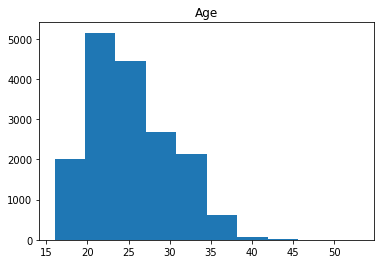

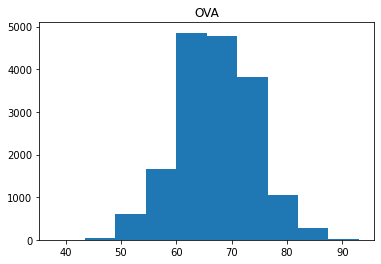

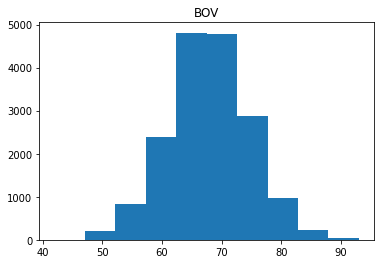

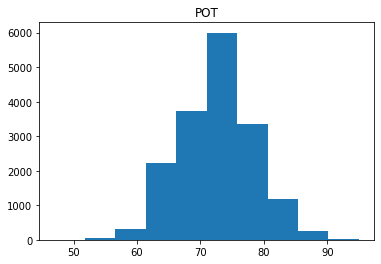

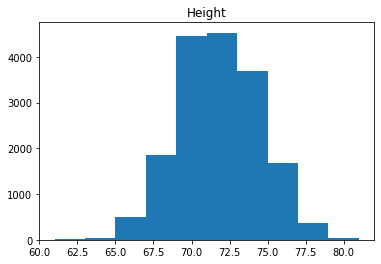

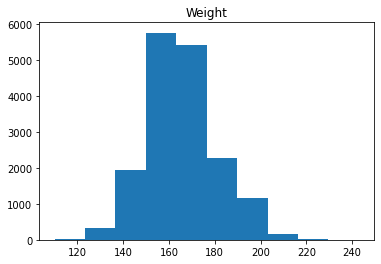

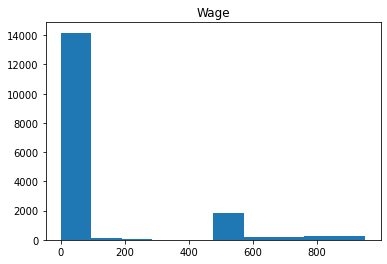

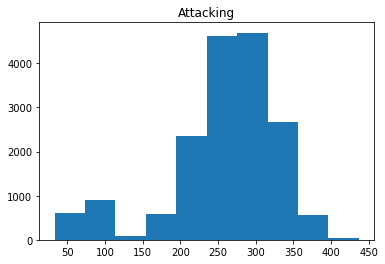

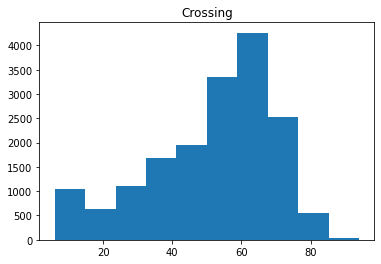

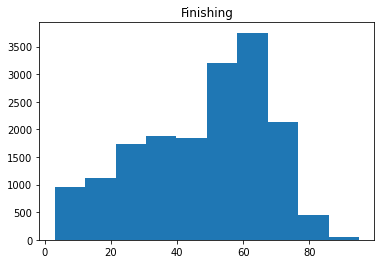

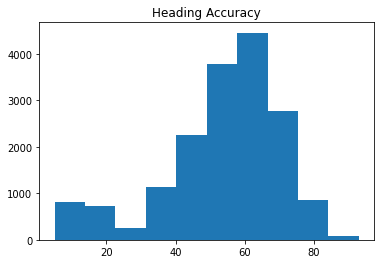

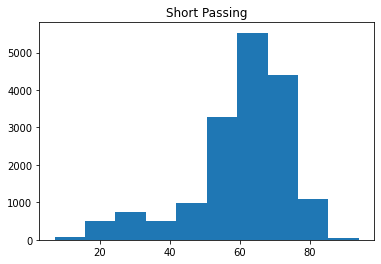

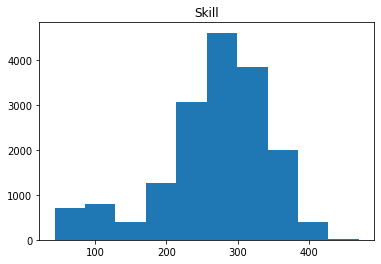

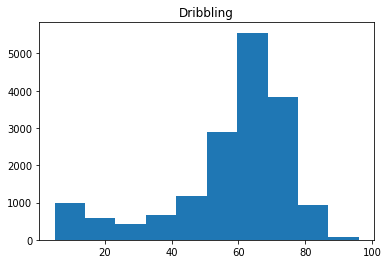

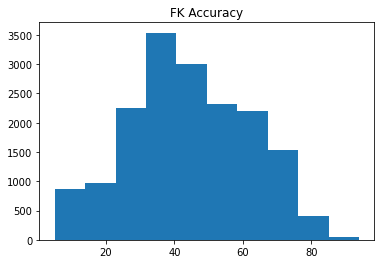

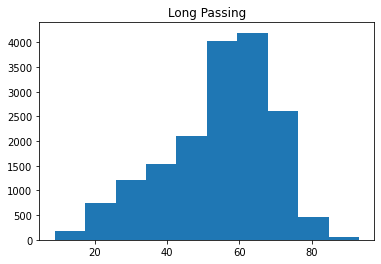

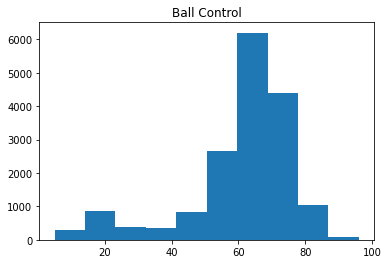

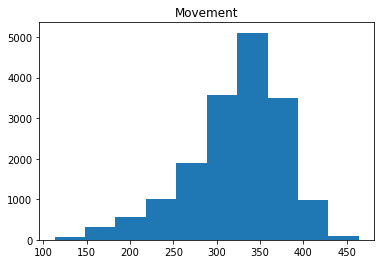

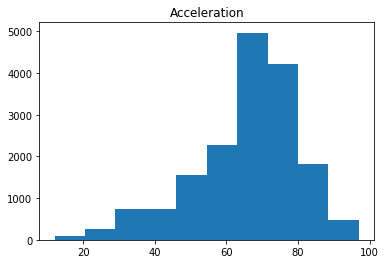

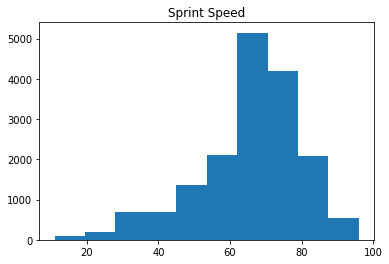

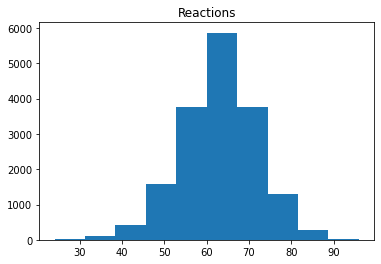

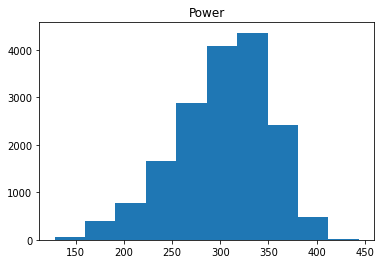

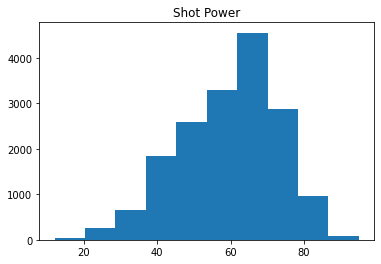

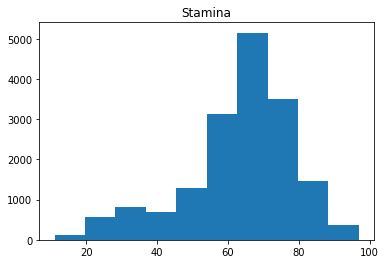

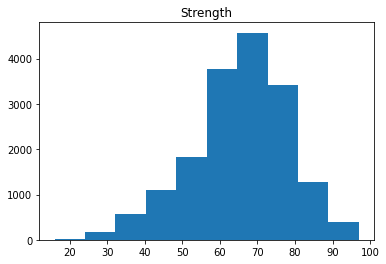

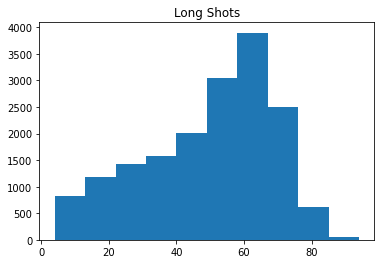

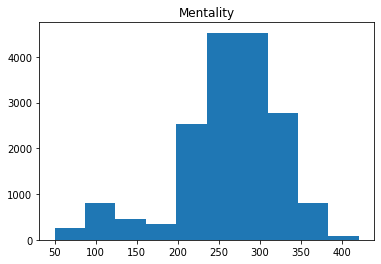

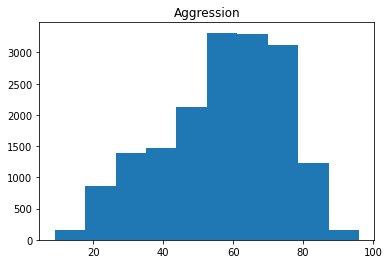

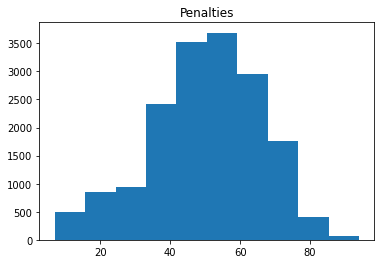

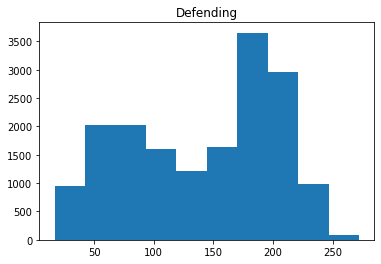

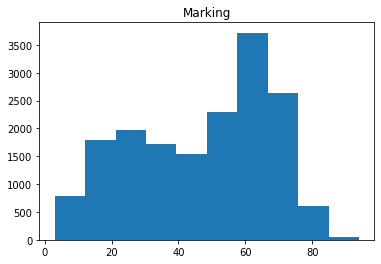

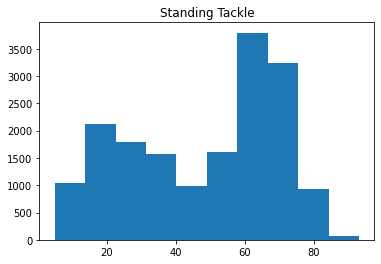

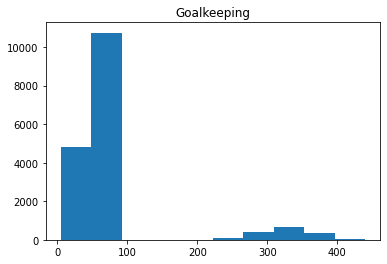

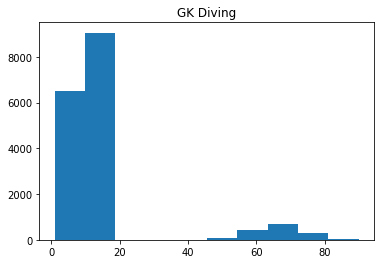

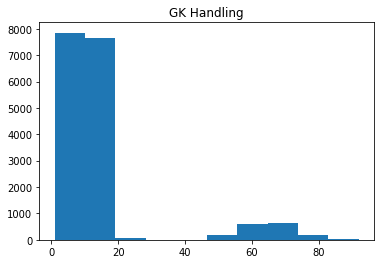

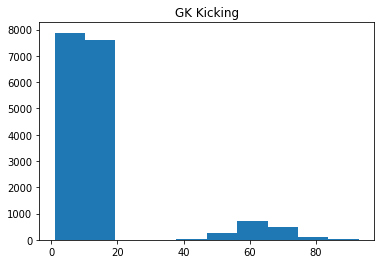

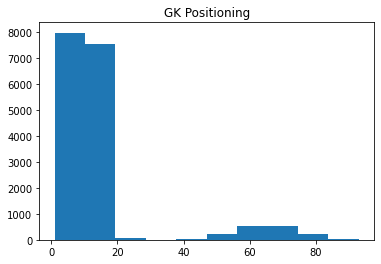

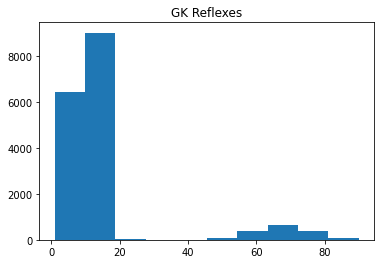

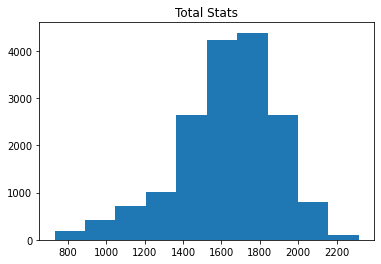

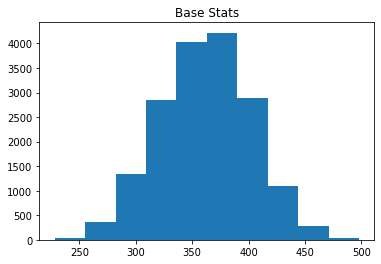

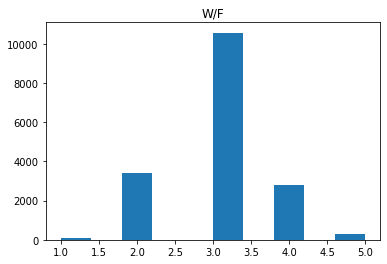

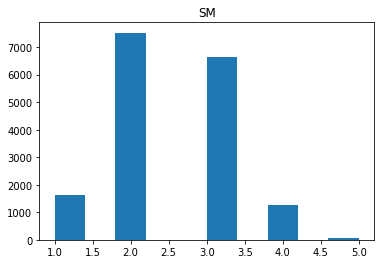

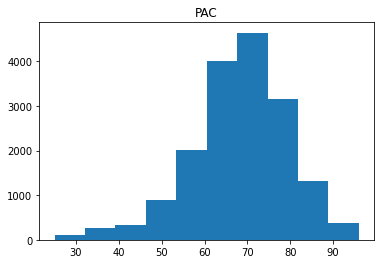

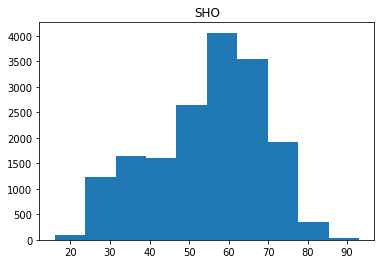

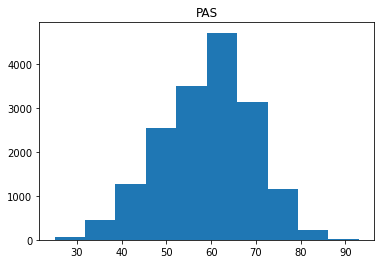

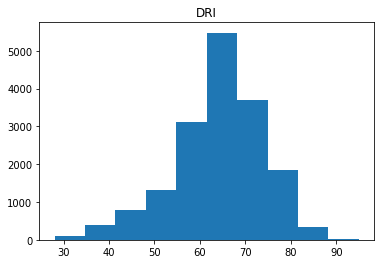

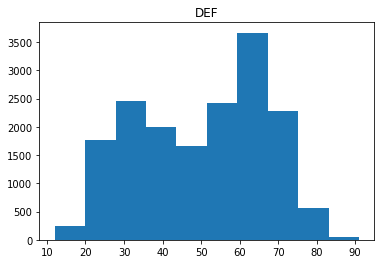

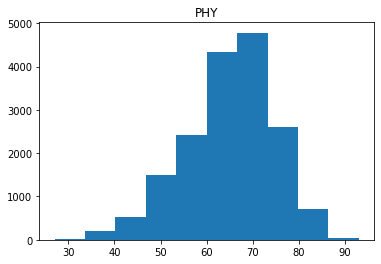

In [92]:
for i in num_int:
    plt.figure()
    plt.hist(data[i])
    plt.title(i)

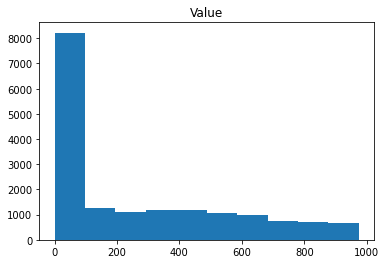

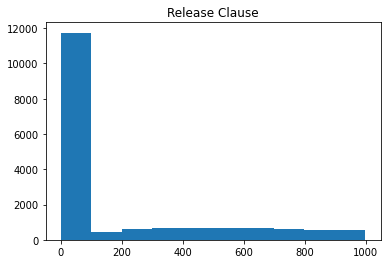

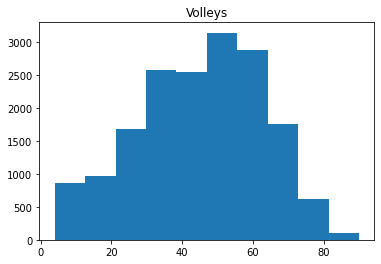

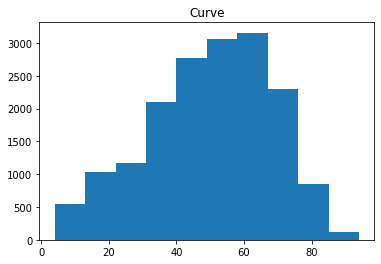

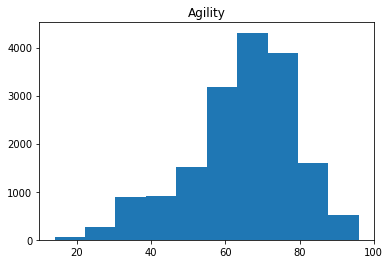

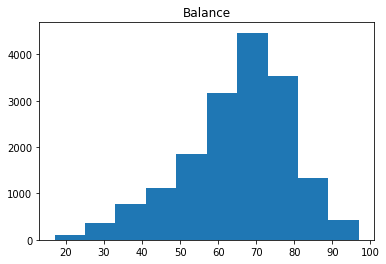

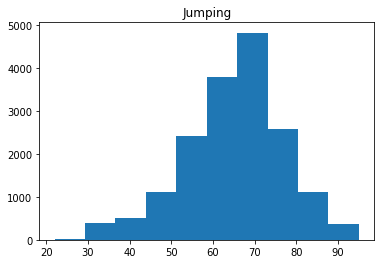

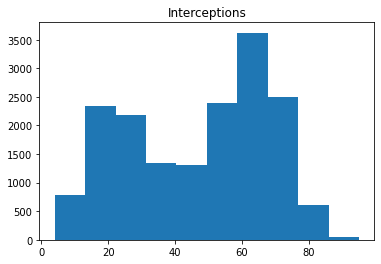

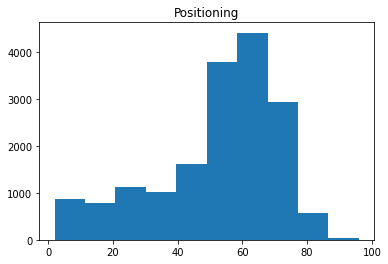

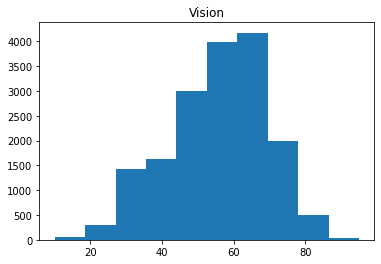

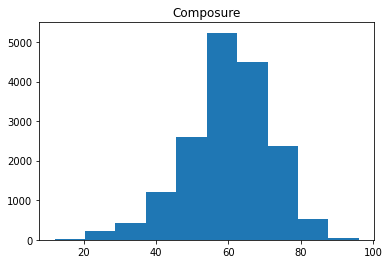

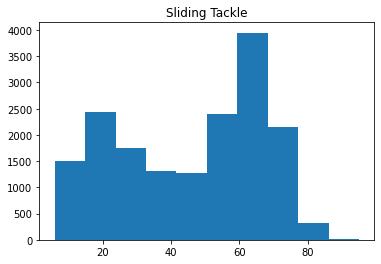

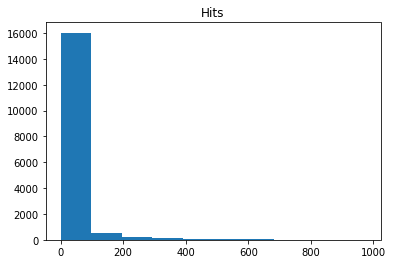

In [93]:
for i in num_float:
    plt.figure()
    plt.hist(data[i])
    plt.title(i)

C:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mauri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

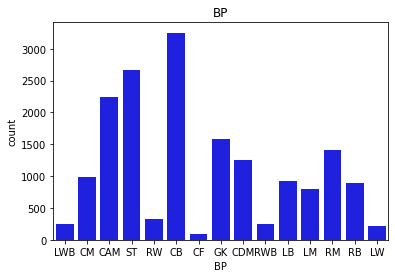

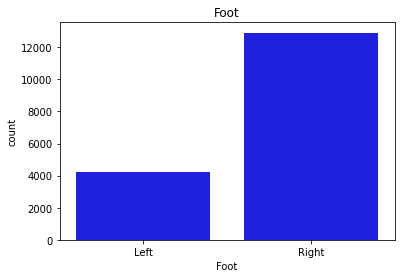

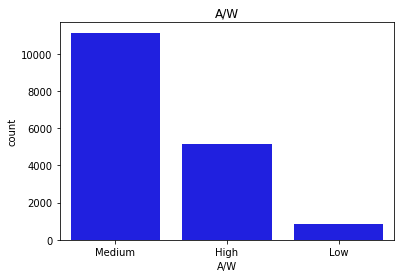

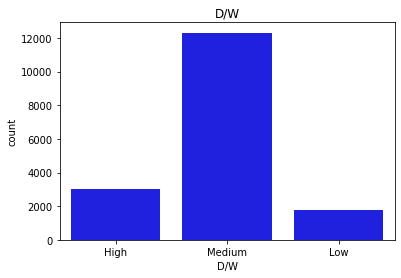

In [94]:
# For categorical data
for i in num_obj:
    ax, fig = plt.subplots()
    x = sns.countplot(data[i], color='blue')
    plt.title(i)

# Log Transformation
## The Columns selected did not appear to be standard normal, although the data did improve a bit,

In [ ]:
bx_array_1 = data['Goalkeeping'].to_numpy()  # First lets turn our dataframe column into an array
# test_cox = data['Goalkeeping']

unique, counts = np.unique(bx_array_1, return_counts=True)

print(np.asarray((unique, counts)).T)

test_cox_2 = stats.boxcox(bx_array_1, lmbda= 0.5) # Now lets feed our functions our array

data['Goalkeeping'] = pd.Series(test_cox_2)

data['Goalkeeping'].shape

plt.figure
plt.hist(data['Goalkeeping'])
plt.show()

# Testing for Boxcox Transformation
num_box_trans = ['Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes']

def box_cox_clean(x):
    x = stats.boxcox(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
    
for i in num_box_trans:
    data[i] = list(map(box_cox_clean, data[i]))

In [95]:
num_log_trans = ['Defending','Marking','Standing Tackle','DEF','Interceptions','Sliding Tackle']

def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
    
for i in num_log_trans:
    data[i] = list(map(log_transform_clean, data[i]))

#Lets cut out the outliers now

for i in num_log_trans:
    iqr = data_stats['IQR'][i]
    upper = data_stats['upper_limit'][i]
    lower = data_stats['lower_limit'][i]
    data = data[(data[i] < upper) & (data[i] > lower)]
    if data.shape[0] == 0:
        print(i)

# 'Defending' Old way
iqr_defend = np.percentile(data['Defending'], 75) - np.percentile(data['Defending'], 25)

ul_defend = np.percentile(data['Defending'],75) + 1.5*iqr_defend
ll_defend = np.percentile(data['Defending'],25) - 1.4*iqr_defend

data_defend_chop = data[(data['Defending'] > ll_defend) & (data['Defending'] < ul_defend)]

print('We lost this many rows of data:', data.shape[0] - data_defend_chop.shape[0])

data = data_defend_chop

sns.displot(data['Defending'])
plt.show()

In [96]:
data[num_log_trans[0]]

0        5.337538
1        5.030438
2        4.595120
3        4.317488
4        5.198497
           ...   
17120    5.288267
17121    4.882802
17122    5.093750
17123    5.192957
17124    3.555348
Name: Defending, Length: 17125, dtype: float64

We lost this many rows of data: 20


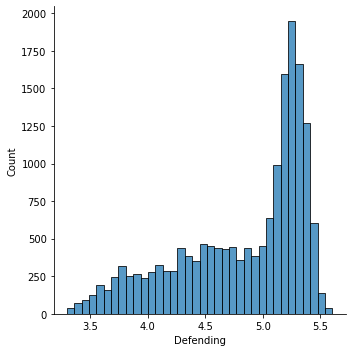

In [97]:
# 'Defending' 0
iqr_defend = np.percentile(data[num_log_trans[0]], 75) - np.percentile(data[num_log_trans[0]], 25)

ul_defend = np.percentile(data[num_log_trans[0]],75) + 1.5*iqr_defend
ll_defend = np.percentile(data[num_log_trans[0]],25) - 1.4*iqr_defend

data_defend_chop = data[(data[num_log_trans[0]] > ll_defend) & (data[num_log_trans[0]] < ul_defend)]

lost_0 = data.shape[0] - data_defend_chop.shape[0]

print('We lost this many rows of data:', data.shape[0] - data_defend_chop.shape[0])

data = data_defend_chop

sns.displot(data[num_log_trans[0]])
plt.show()

We lost this many rows of data: 293


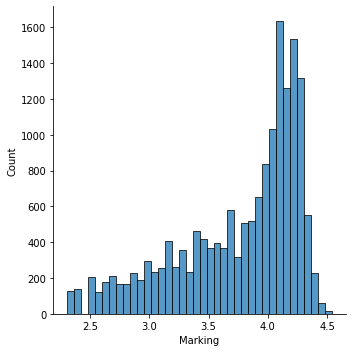

In [98]:
# 'Marking' 1
iqr_mark = np.percentile(data[num_log_trans[1]], 75) - np.percentile(data[num_log_trans[1]], 25)

ul_mark = np.percentile(data[num_log_trans[1]],75) + 1.5*iqr_mark
ll_mark = np.percentile(data[num_log_trans[1]],25) - 1.5*iqr_mark

data_mark_chop = data[(data[num_log_trans[1]] > ll_mark) & (data[num_log_trans[1]] < ul_mark)]

lost_1 = data.shape[0] - data_mark_chop.shape[0]

print('We lost this many rows of data:', data.shape[0] - data_mark_chop.shape[0])

data = data_mark_chop

sns.displot(data[num_log_trans[1]])
plt.show()

We lost this many rows of data: 135


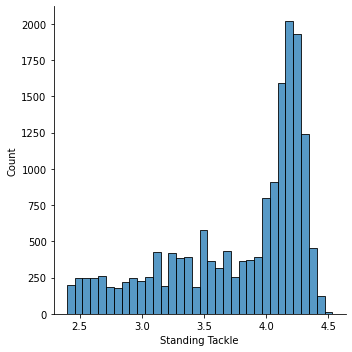

In [99]:
# 'Standing Tackle' 2
iqr_st = np.percentile(data[num_log_trans[2]], 75) - np.percentile(data[num_log_trans[2]], 25)

ul_st = np.percentile(data[num_log_trans[2]],75) + 1.5*iqr_st
ll_st = np.percentile(data[num_log_trans[2]],25) - 1.2*iqr_st

data_st_chop = data[(data[num_log_trans[2]] > ll_st) & (data[num_log_trans[2]] < ul_st)]

lost_2 = data.shape[0] - data_st_chop.shape[0]

print('We lost this many rows of data:', data.shape[0] - data_st_chop.shape[0])

data = data_st_chop

sns.displot(data[num_log_trans[2]])
plt.show()

We lost this many rows of data: 42


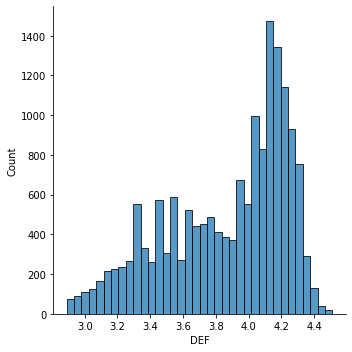

In [100]:
# 'DEF' 3
iqr_DEF = np.percentile(data[num_log_trans[3]], 75) - np.percentile(data[num_log_trans[3]], 25)

ul_DEF = np.percentile(data[num_log_trans[3]],75) + 1.5*iqr_DEF
ll_DEF = np.percentile(data[num_log_trans[3]],25) - 1.2*iqr_DEF

data_DEF_chop = data[(data[num_log_trans[3]] > ll_DEF) & (data[num_log_trans[3]] < ul_DEF)]

lost_3 = data.shape[0] - data_DEF_chop.shape[0]

print('We lost this many rows of data:', data.shape[0] - data_DEF_chop.shape[0])

data = data_DEF_chop

sns.displot(data[num_log_trans[3]])
plt.show()

We lost this many rows of data: 121


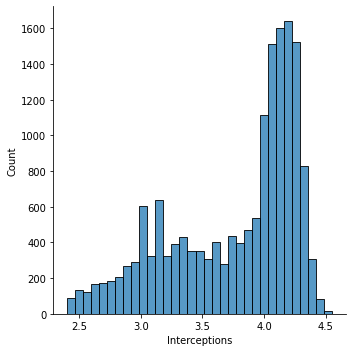

In [101]:
# 'Interceptions' 4

iqr_inter = np.percentile(data[num_log_trans[4]], 75) - np.percentile(data[num_log_trans[4]], 25)

ul_inter = np.percentile(data[num_log_trans[4]],75) + 1.5*iqr_inter
ll_inter = np.percentile(data[num_log_trans[4]],25) - 1.2*iqr_inter

data_inter_chop = data[(data[num_log_trans[4]] > ll_inter) & (data[num_log_trans[4]] < ul_inter)]

lost_4 = data.shape[0] - data_inter_chop.shape[0]

print('We lost this many rows of data:', data.shape[0] - data_inter_chop.shape[0])

data = data_inter_chop

sns.displot(data[num_log_trans[4]])
plt.show()

We lost this many rows of data: 14


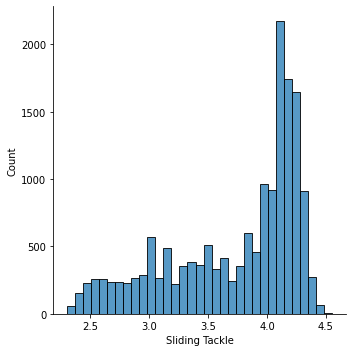

In [102]:
# 'Sliding Tackle' 5
iqr_slide = np.percentile(data[num_log_trans[5]], 75) - np.percentile(data[num_log_trans[5]], 25)

ul_slide = np.percentile(data[num_log_trans[5]],75) + 1.5*iqr_slide
ll_slide = np.percentile(data[num_log_trans[5]],25) - 1.2*iqr_slide #maybe 1.1....

data_slide_chop = data[(data[num_log_trans[5]] > ll_slide) & (data[num_log_trans[5]] < ul_slide)]

lost_5 = data.shape[0] - data_slide_chop.shape[0]

print('We lost this many rows of data:', data.shape[0] - data_slide_chop.shape[0])

data = data_slide_chop

sns.displot(data[num_log_trans[5]])
plt.show()

In [103]:
total_lost = lost_1+lost_2+lost_3+lost_4+lost_5

In [104]:
print('We have lost a total of',total_lost,'rows, or' ,  round(total_lost/rows_with_outliers*100,2),'% of our data')

We have lost a total of 605 rows, or 3.53 % of our data


In [105]:
print('We have lost a total of',rows_with_outliers - data.shape[0],'rows')

We have lost a total of 625 rows


for i in range(len(num_int)):
    plt.figure()
    plt.hist(data[num_int[i]])
    plt.title(num_int[i])

#Lets hold this off till later
for i in num_int_out_2:
    plt.figure()
    plt.hist(data[i])
    plt.title(i)

In [106]:
num_int = []
num_float = []
num_obj = []
for column in data:
    if data[column].dtypes == 'int64': 
        num_int.append(column)
    if data[column].dtypes == 'float64': 
        num_float.append(column)
    if data[column].dtypes == 'O': 
        num_obj.append(column)

for i in num_int:
    plt.figure()
    plt.hist(data[i])
    plt.title(i)

for i in num_float:
    plt.figure()
    plt.hist(data[i])
    plt.title(i)

# For categorical data
for i in num_obj:
    ax, fig = plt.subplots()
    x = sns.countplot(data[i], color='gray')
    plt.title(i)

three_types(data)

In [107]:
num_int = []
num_float = []
num_obj = []
for column in data:
    if data[column].dtypes == 'int64': 
        num_int.append(column)
    if data[column].dtypes == 'float64': 
        num_float.append(column)
    if data[column].dtypes == 'O': 
        num_obj.append(column)

In [108]:
data[num_int[0]]

0        33
1        37
2        33
3        36
4        36
         ..
17118    19
17120    22
17121    18
17122    18
17123    20
Name: Age, Length: 16500, dtype: int64

In [109]:
num_int

['Age',
 'OVA',
 'BOV',
 'POT',
 'Height',
 'Weight',
 'Wage',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Skill',
 'Dribbling',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Reactions',
 'Power',
 'Shot Power',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Penalties',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'PHY']

In [110]:
range(len(num_int))

range(0, 44)

for i in num_log_trans:
    plt.figure()
    plt.hist(data[i])
    plt.title(i)

# Correlation Matrix

In [111]:
corr_data = data.select_dtypes(include = 'number')
correlation_matrix = corr_data.corr()
correlation_matrix

,Age,OVA,BOV,POT,Height,Weight,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,PAC,SHO,PAS,DRI,DEF,PHY,Hits
Age,1.000000,0.509997,0.445878,-0.243927,0.107864,0.268099,-0.131028,-0.219591,-0.098297,0.174987,0.136130,0.089302,0.163108,0.163299,0.177089,0.154880,0.008221,0.169304,0.215873,0.211518,0.098888,-0.108637,-0.251397,-0.246902,-0.079745,0.493457,-0.122113,0.309582,0.300431,0.187771,0.039210,0.346727,0.181389,0.273379,0.269546,0.149812,0.104378,0.225478,0.190550,0.407926,0.053085,0.091290,0.043936,0.021974,0.181030,0.174743,0.179347,0.185455,0.185417,0.176386,0.275935,0.403262,0.074601,0.052467,-0.201228,0.314910,0.394871,0.233997,0.201286,0.426459,-0.101398
OVA,0.509997,1.000000,0.985453,0.593914,0.048324,0.165749,-0.344947,-0.298101,-0.438277,0.436357,0.377039,0.289611,0.289088,0.502534,0.349172,0.441699,0.340829,0.389330,0.355846,0.478194,0.436134,0.271968,0.096140,0.105435,0.193005,0.870264,0.064980,0.550946,0.527787,0.240732,0.318020,0.327035,0.383352,0.505128,0.367588,0.229829,0.327422,0.497931,0.302127,0.704917,0.160901,0.197614,0.148600,0.118816,0.101328,0.099529,0.100990,0.101812,0.104049,0.098695,0.625583,0.824508,0.187605,0.332747,0.176034,0.498966,0.703631,0.639255,0.289953,0.524828,0.373306
BOV,0.445878,0.985453,1.000000,0.633474,0.043260,0.151197,-0.346872,-0.291830,-0.443391,0.460191,0.380693,0.314442,0.309692,0.536352,0.366555,0.465482,0.370099,0.401178,0.366489,0.504935,0.468148,0.295449,0.122412,0.132055,0.213301,0.868763,0.083761,0.568690,0.540270,0.240862,0.342950,0.322128,0.404367,0.523972,0.376897,0.239231,0.346455,0.515946,0.315285,0.714161,0.177769,0.214217,0.165616,0.135050,0.063820,0.062194,0.064186,0.066826,0.067889,0.062129,0.644146,0.822637,0.195857,0.354120,0.185802,0.494855,0.697989,0.639224,0.289584,0.516462,0.399988
POT,-0.243927,0.593914,0.633474,1.000000,-0.016129,-0.036575,-0.279231,-0.076495,-0.383132,0.248280,0.215527,0.174365,0.135520,0.342781,0.176744,0.279566,0.282292,0.224272,0.163208,0.291848,0.317974,0.267437,0.199172,0.199607,0.186945,0.476423,0.129967,0.225174,0.264034,0.066353,0.172091,0.024250,0.194155,0.258200,0.134991,0.101430,0.196599,0.307298,0.145476,0.377968,0.098299,0.104052,0.097715,0.089895,0.006435,0.007176,0.009183,0.012560,0.009779,0.007645,0.350830,0.471097,0.130497,0.244635,0.250875,0.245247,0.395156,0.441223,0.133657,0.147275,0.513727
Height,0.107864,0.048324,0.043260,-0.016129,1.000000,0.764437,0.008527,-0.043585,0.012843,-0.303556,-0.465421,-0.316955,0.171748,-0.304698,-0.287802,-0.421862,-0.456742,-0.406211,-0.364270,-0.269977,-0.371519,-0.628033,-0.534094,-0.424776,-0.629785,0.029091,-0.779303,-0.057421,-0.134583,0.056362,-0.219335,0.598714,-0.332149,-0.244939,0.056523,-0.014501,-0.388983,-0.341059,-0.257518,-0.095904,-0.055949,-0.044583,-0.050828,-0.060614,0.292729,0.286803,0.288430,0.278877,0.287564,0.290201,-0.322868,-0.114298,-0.147501,-0.389550,-0.381907,-0.116956,-0.224546,-0.330934,0.124957,0.473835,0.010041
Weight,0.268099,0.165749,0.151197,-0.036575,0.764437,1.000000,-0.026810,-0.067728,-0.026994,-0.214651,-0.373063,-0.234099,0.184369,-0.227213,-0.196409,-0.329590,-0.381700,-0.313936,-0.268432,-0.200501,-0.293202,-0.541439,-0.491252,-0.394554,-0.556772,0.136610,-0.666784,0.068365,-0.016479,0.113932,-0.172398,0.677281,-0.226850,-0.151649,0.124131,-0.009635,-0.300660,-0.252844,-0.168035,0.002615,-0.061062,-0.042049,-0.058923,-0.072244,0.287556,0.282228,0.283477,0.274781,0.284658,0.284075,-0.207886,0.007316,-0.107528,-0.323665,-0.345461,-0.010181,-0.116765,-0.225317,0.119508,0.561401,0.000253
Value,-0.131028,-0.34

In [112]:
correlation_matrix.shape

(61, 61)

correlation_matrix = correlation_matrix.iloc[1:,:-1].copy()
correlation_matrix.shape

In [113]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

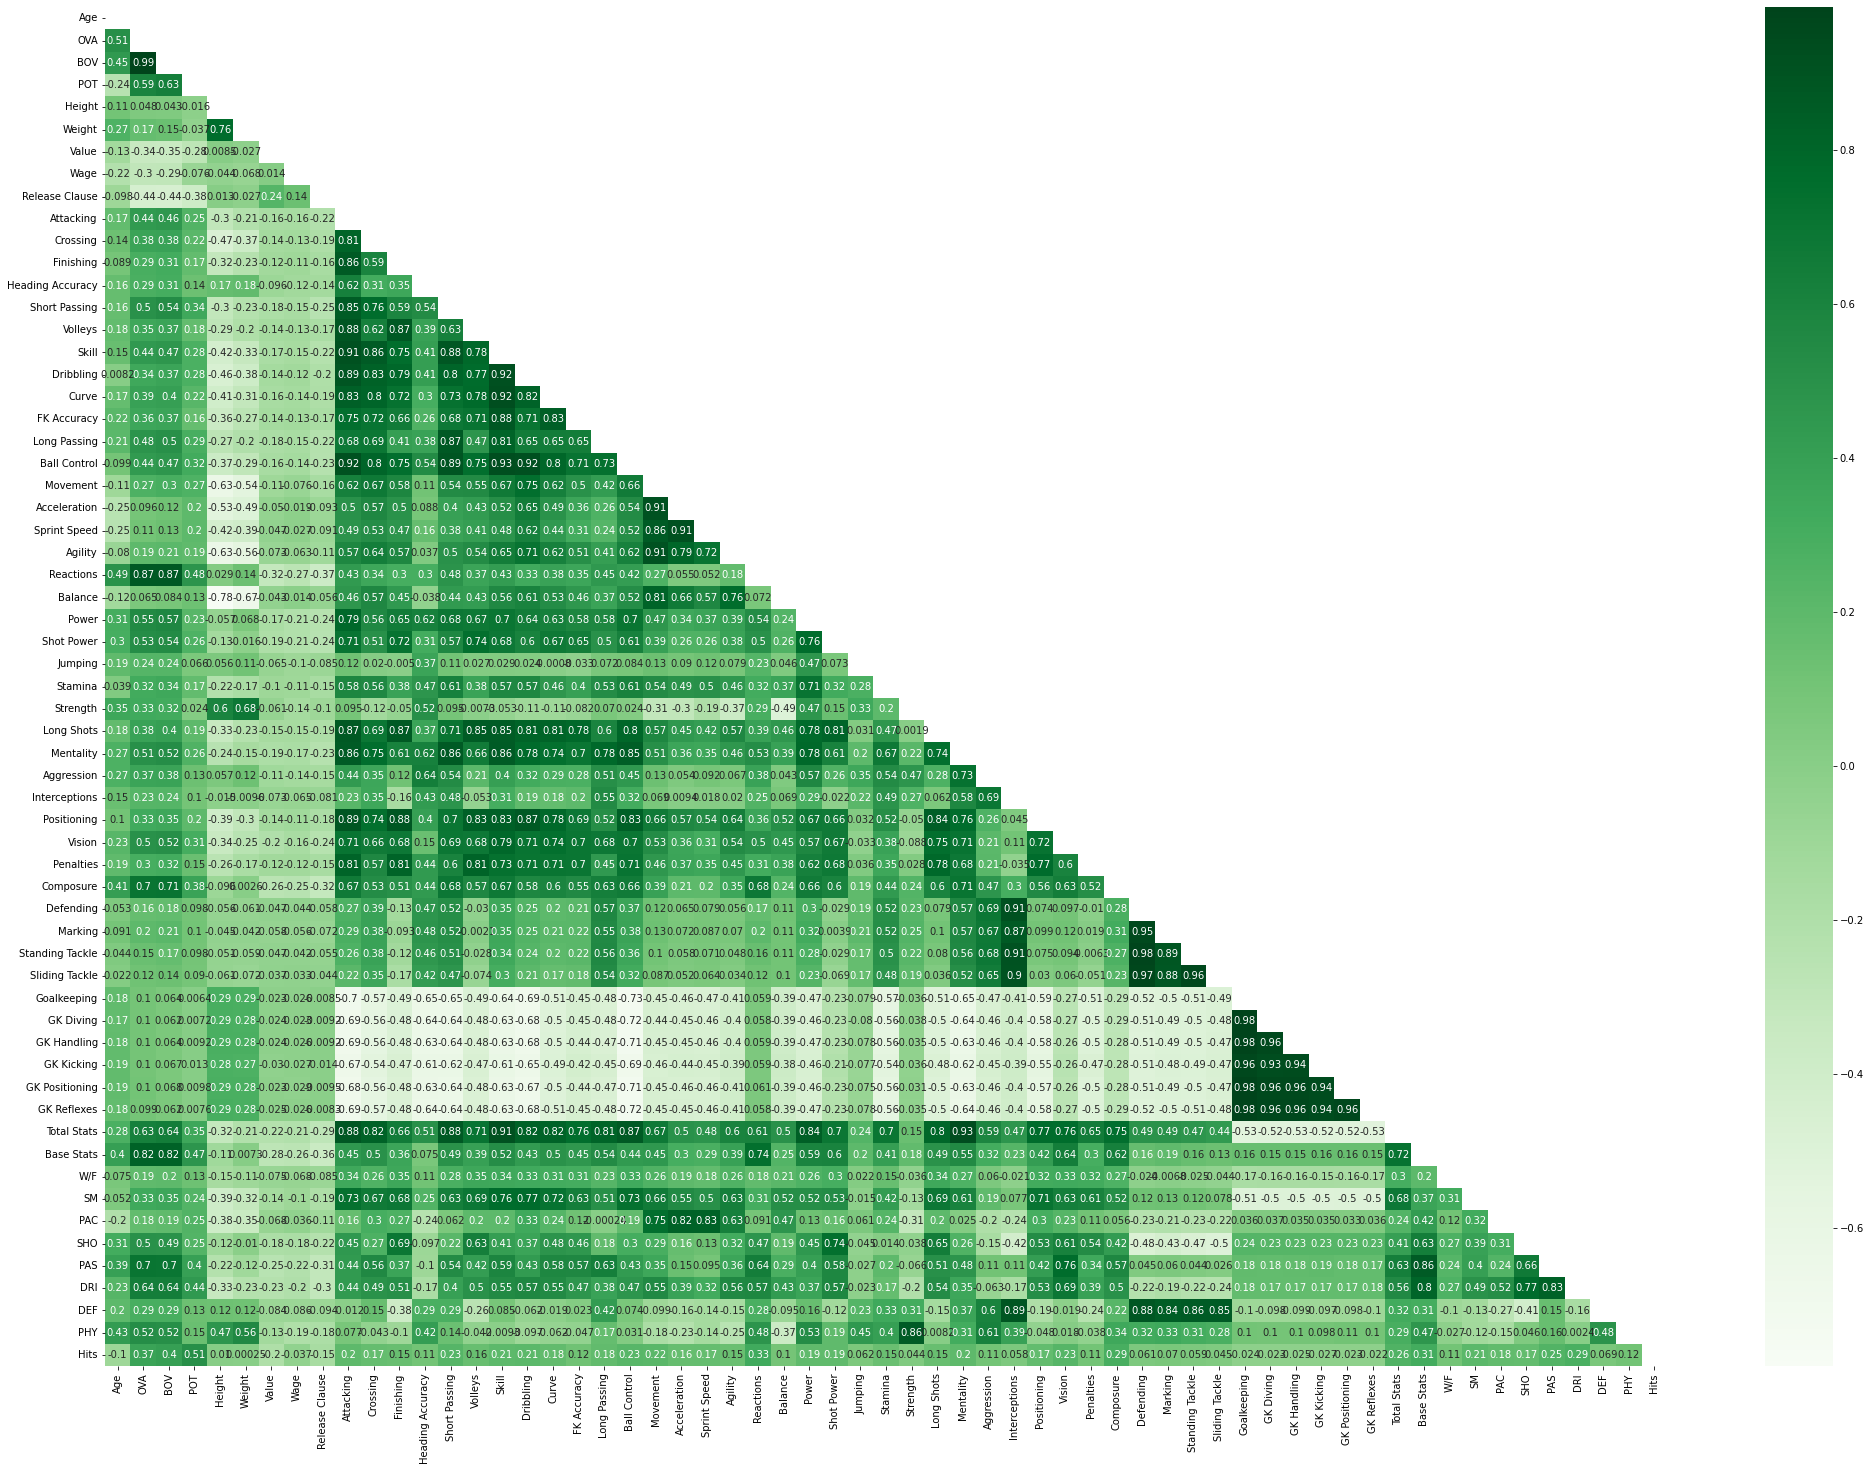

In [114]:
fig, ax = plt.subplots(figsize=(35,25))  
ax = sns.heatmap(correlation_matrix, mask=mask, annot= True, cmap="Greens")
plt.yticks(rotation=0) #angles
plt.show()

In [115]:
correlation_matrix.shape

(61, 61)

In [116]:
mask.shape

(61, 61)

# Notes about correlation Matrix

1. It makes sense that goalkeeping, gk diving, gk kicking, and gk reflexes all correlae very strongly with eachother, since if a goalie is good at one aspect of goal keeping, then it makes sense that the other goalie skills are high,
and the same can be said with low gk skills. This can also be seen with DEF correlating with defending, marking, standing tackle and sliding tackle

In [117]:
data.select_dtypes(include = 'O')

,BP,Foot,A/W,D/W
0,LWB,Left,Medium,High
1,CM,Right,Medium,Medium
2,CAM,Right,Medium,Low
3,ST,Right,Medium,Medium
4,CAM,Right,High,Medium
...,...,...,...,...
17118,ST,Right,Medium,Medium
17120,CB,Right,Medium,Medium
17121,CAM,Right,Medium,Medium
17122,RB,Right,Medium,Medium


In [118]:
data.shape

(16500, 65)

In [119]:
data.info() #Thank you Luis!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16500 entries, 0 to 17123
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               16500 non-null  int64  
 1   OVA               16500 non-null  int64  
 2   BOV               16500 non-null  int64  
 3   BP                16500 non-null  object 
 4   POT               16500 non-null  int64  
 5   Height            16500 non-null  int64  
 6   Weight            16500 non-null  int64  
 7   Foot              16500 non-null  object 
 8   Value             16500 non-null  float64
 9   Wage              16500 non-null  int64  
 10  Release Clause    16500 non-null  float64
 11  Attacking         16500 non-null  int64  
 12  Crossing          16500 non-null  int64  
 13  Finishing         16500 non-null  int64  
 14  Heading Accuracy  16500 non-null  int64  
 15  Short Passing     16500 non-null  int64  
 16  Volleys           16500 non-null  float6

In [120]:
Y = data['OVA']
data.drop(['OVA'], inplace = True, axis =1)

C:\Users\mauri\AppData\Local\Temp/ipykernel_34320/1152456397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['OVA'], inplace = True, axis =1)


In [121]:
Y

0        69
1        71
2        71
3        68
4        81
         ..
17118    54
17120    64
17121    56
17122    56
17123    62
Name: OVA, Length: 16500, dtype: int64

In [122]:
data.head()

,Age,BOV,BP,POT,Height,Weight,Foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,33,71,LWB,69,72,181,Left,625.0,7,0.0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,4.234107,63.0,66.000000,50,59.940965,5.337538,4.248495,4.234107,4.234107,56,14,5,15,10,12,1929,408,3,2,Medium,High,71,59,70,71,4.219508,69,4.0
1,37,70,CM,71,70,143,Right,600.0,7,1.1,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,4.262680,72.0,73.000000,75,79.000000,5.030438,4.248495,3.761200,3.688879,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,53,69,73,69,4.060443,63,4.0
2,33,71,CAM,71,69,161,Right,1.1,15,0.0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,3.663562,69.0,74.000000,66,59.940965,4.595120,3.555348,3.526361,3.401197,51,9,6,13,16,7,1770,354,4,4,Medium,Low,45,68,76,77,3.583519,52,11.0
3,36,70,ST,82,71,165,Right,0.0,0,0.0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,4.248495,72.0,55.443605,70,59.940965,4.317488,3.526361,3.713572,3.830807,68,5,21,64,21,21,1348,369,3,1,Medium,Medium,61,66,66,69,3.850148,60,3.0
4,36,82,CAM,81,67,150,Right,5.5,12,7.2,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,4.248495,78.0,93.000000,71,89.000000,5.198497,4.219508,4.043051,4.025352,45,6,13,6,13,7,2014,420,4,4,High,Medium,58,70,85,85,4.143135,59,149.0


In [123]:
# Remember, you dropped OVA! Thats why you have 60 instead of 61
data.select_dtypes(include = np.number).shape

(16500, 60)

In [124]:
data.select_dtypes(include = 'O').shape

(16500, 4)

In [125]:
X_num = data.select_dtypes(include = np.number)
X_num.reset_index(inplace = True, drop = True)
X_num

,Age,BOV,POT,Height,Weight,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,33,71,69,72,181,625.0,7,0.0,313,75,50,59,71,58.000000,338,73,65.000000,60,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,68,320,72,4.234107,63.0,66.000000,50,59.940965,5.337538,4.248495,4.234107,4.234107,56,14,5,15,10,12,1929,408,3,2,71,59,70,71,4.219508,69,4.0
1,37,70,71,70,143,600.0,7,1.1,337,68,64,61,76,68.000000,369,69,79.000000,79,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,71,362,71,4.262680,72.0,73.000000,75,79.000000,5.030438,4.248495,3.761200,3.688879,56,9,12,13,11,11,1906,385,4,3,53,69,73,69,4.060443,63,4.0
2,33,71,71,69,161,1.1,15,0.0,337,80,64,41,77,75.000000,387,79,84.000000,77,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,69,317,69,3.663562,69.0,74.000000,66,59.940965,4.595120,3.555348,3.526361,3.401197,51,9,6,13,16,7,1770,354,4,4,45,68,76,77,3.583519,52,11.0
3,36,70,82,71,165,0.0,0,0.0,264,54,70,60,80,45.005742,255,68,49.574676,46,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,59,271,59,4.248495,72.0,55.443605,70,59.940965,4.317488,3.526361,3.713572,3.830807,68,5,21,64,21,21,1348,369,3,1,61,66,66,69,3.850148,60,3.0
4,36,82,81,67,150,5.5,12,7.2,367,75,69,54,90,79.000000,408,85,80.000000,70,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,70,370,58,4.248495,78.0,93.000000,71,89.000000,5.198497,4.219508,4.043051,4.025352,45,6,13,6,13,7,2014,420,4,4,58,70,85,85,4.143135,59,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,19,56,68,73,161,150.0,900,356.0,223,30,55,52,43,43.000000,199,50,38.000000,30,29,52,303,66,67,62.000000,50,58.000000,290,53,67.000000,57,65,48,221,46,3.091042,53.0,45.000000,55,50.000000,4.174387,3.178054,2.944439,3.091042,50,7,11,6,12,14,1351,294,3,2,67,53,38,52,3.218876,59,3.0
16496,22,66,69,78,165,550.0,2,0.0,197,35,23,66,47,26.000000,193,44,26.000000,33,34,56,243,52,55,46.000000,48,42.000000,279,48,70.000000,59,74,28,218,69,4.060443,23.0,29.000000,39,46.000000,5.288267,4.110874,4.262680,4.189655,39,11,8,8,5,7,1367,302,2,2,54,30,37,48,4.158883,69,5.0
16497,18,58,66,70,170,130.0,3,273.0,248,50,43,50,64,41.000000,264,57,42.000000,50,61,54,298,61,63,52.000000,54,68.000000,271,51,62.000000,53,57,48,259,51,3.912023,55.0,53.000000,50,46.000000,4.882802,3.526361,3.737670,4.025352,57,12,15,7,12,11,1529,319,3,2,62,46,57,56,3.761200,55,5.0
16498,18,56,67,69,154,130.0,2,273.0,218,55,34,53,42,34.000000,212,52,43.000000,34,36,47,308,66,61,54.000000,59,68.000000,233,28,61.000000,53,54,37,256,58,4.007333,49.0,45.000000,49,43.000000,5.093750,4.007333,3.988984,3.988984,40,8,7,5,12,8,1430,303,3,2,63,35,44,52,3.988984,55,3.0


In [126]:
X_cat = data.select_dtypes(include = 'O')
X_cat.reset_index(inplace = True, drop = True)
X_cat

,BP,Foot,A/W,D/W
0,LWB,Left,Medium,High
1,CM,Right,Medium,Medium
2,CAM,Right,Medium,Low
3,ST,Right,Medium,Medium
4,CAM,Right,High,Medium
...,...,...,...,...
16495,ST,Right,Medium,Medium
16496,CB,Right,Medium,Medium
16497,CAM,Right,Medium,Medium
16498,RB,Right,Medium,Medium


data['Team & Contract'].nunique()

h = "66\'0\""

h = """6'10"""

import re
h2 = re.findall("\d+",h)


h2

int(h2[0])*12 + int(h2[1])

In [127]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)

In [128]:
encoder = OneHotEncoder().fit(X_cat)
encoded = encoder.transform(X_cat).toarray()

In [129]:
x_normalized.shape

(16500, 60)

In [130]:
encoded.shape

(16500, 23)

In [131]:
X = np.concatenate((x_normalized,encoded), axis = 1)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=100)

In [133]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.9570280623743264

In [134]:
mse = mean_squared_error(y_test, predictions)
print(mse)

1.9325141453598484


In [135]:
rmse = math.sqrt(mse)
print(rmse)

1.3901489651687866


In [136]:
r2 = r2_score(y_test, predictions)
r2

0.9570280623743264

In [137]:
n = len(X_test) 
p = X_test.shape[1]

In [138]:
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adj_r2 # Penalty for adj_r2

0.9561454415322251

# Confusion Matrix

In [160]:
type(eval('2+2'))

int

In [ ]:
data_fifa21['release clause'] = data_fifa21['release clause'].replace({'K' : '*1e3', 'M' : '*1e6', '€' : ''}, regex = True).map(pd.eval).astype(int)

In [2]:
n = 3

In [3]:
n


3

^\w+|\d{1,4}$